### Read the csv file into a dataframe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

beacon_df = pd.read_csv('..\data\\beacon_events_train.csv')

In [3]:
print(beacon_df.head())

        event_id   host_id            timestamp          src_ip  \
0  EVT-373857567  HOST-116  2025-02-02 19:44:31  192.168.59.229   
1  EVT-380924157  HOST-028  2025-02-06 06:39:00   10.184.88.189   
2  EVT-674957844  HOST-055  2025-02-07 19:08:52  192.168.220.53   
3  EVT-910824095  HOST-107  2025-02-01 12:51:28   10.182.26.253   
4  EVT-959358092  HOST-008  2025-02-01 12:44:21   10.144.27.253   

          dst_ip  dst_port protocol  bytes_out  bytes_in  inter_event_seconds  \
0   30.22.199.92        53      dns       7883      3178            60.970370   
1   214.88.35.75        80      tcp       4905     33319           364.783584   
2   122.183.77.3       443    https       6785      3914            85.435310   
3  221.107.37.31       443    https       2694      3732            76.606740   
4   99.43.113.49       443    https       3379       824            78.295573   

        proc_name     user country_code  signed_binary  label  
0    rundll32.exe  user032           JP       

In [4]:
print(beacon_df.shape)

(10000, 15)


In [5]:
print (beacon_df.columns.tolist())
old_column_order = beacon_df.columns.tolist()

['event_id', 'host_id', 'timestamp', 'src_ip', 'dst_ip', 'dst_port', 'protocol', 'bytes_out', 'bytes_in', 'inter_event_seconds', 'proc_name', 'user', 'country_code', 'signed_binary', 'label']


In [6]:
print(beacon_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_id             10000 non-null  object 
 1   host_id              10000 non-null  object 
 2   timestamp            10000 non-null  object 
 3   src_ip               10000 non-null  object 
 4   dst_ip               10000 non-null  object 
 5   dst_port             10000 non-null  int64  
 6   protocol             10000 non-null  object 
 7   bytes_out            10000 non-null  int64  
 8   bytes_in             10000 non-null  int64  
 9   inter_event_seconds  9500 non-null   float64
 10  proc_name            10000 non-null  object 
 11  user                 10000 non-null  object 
 12  country_code         10000 non-null  object 
 13  signed_binary        10000 non-null  int64  
 14  label                10000 non-null  int64  
dtypes: float64(1), int64(5), object(9)
me

#### list unique values counts of different columns

In [7]:
# Country code analysis
print(f'Total number of countries: {beacon_df["country_code"].nunique()}')
# Display the count of records per country code
print(beacon_df.value_counts('country_code'))

Total number of countries: 18
country_code
US    2160
IN     794
DE     750
CA     750
FR     745
GB     731
NL     717
JP     709
CN     281
RU     276
VN     274
BR     264
UA     264
HK     264
NG     261
TR     258
IR     253
KP     249
Name: count, dtype: int64


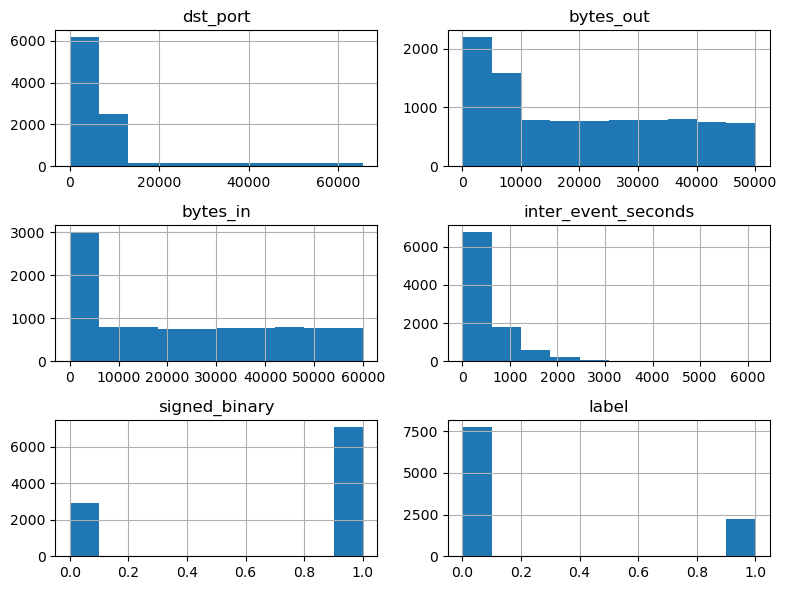

In [8]:
# Plot histograms for all numerical columns
beacon_df.hist(figsize=(8, 6)) # Adjust figsize for better visualization
plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [9]:
# Distribution of proc_name

# Country code analysis
print(f'Total number of countries: {beacon_df["proc_name"].nunique()}')
# Display the count of records per country code
print(beacon_df.value_counts('proc_name'))

Total number of countries: 20
proc_name
firefox.exe          803
teams.exe            776
zoom.exe             773
word.exe             763
outlook.exe          759
spotify.exe          758
slack.exe            748
onedrive.exe         747
chrome.exe           735
excel.exe            724
meterpreter.exe      275
cmd.exe              264
sliver-client.exe    257
rundll32.exe         237
regsvr32.exe         235
powershell.exe       235
unknown.bin          233
cscript.exe          229
mshta.exe            227
wscript.exe          222
Name: count, dtype: int64


In [10]:
## TODO: try changing the order to original order based on column name

df_proc_name = beacon_df.value_counts('proc_name').reset_index()
df_proc_name.columns = ['proc_name', 'count']
df_proc_name['proc_name'] = df_proc_name['proc_name'].str.replace('.exe', '', regex=False)
df_proc_name.head(25)





,proc_name,count
0,firefox,803
1,teams,776
2,zoom,773
3,word,763
4,outlook,759
5,spotify,758
6,slack,748
7,onedrive,747
8,chrome,735
9,excel,724


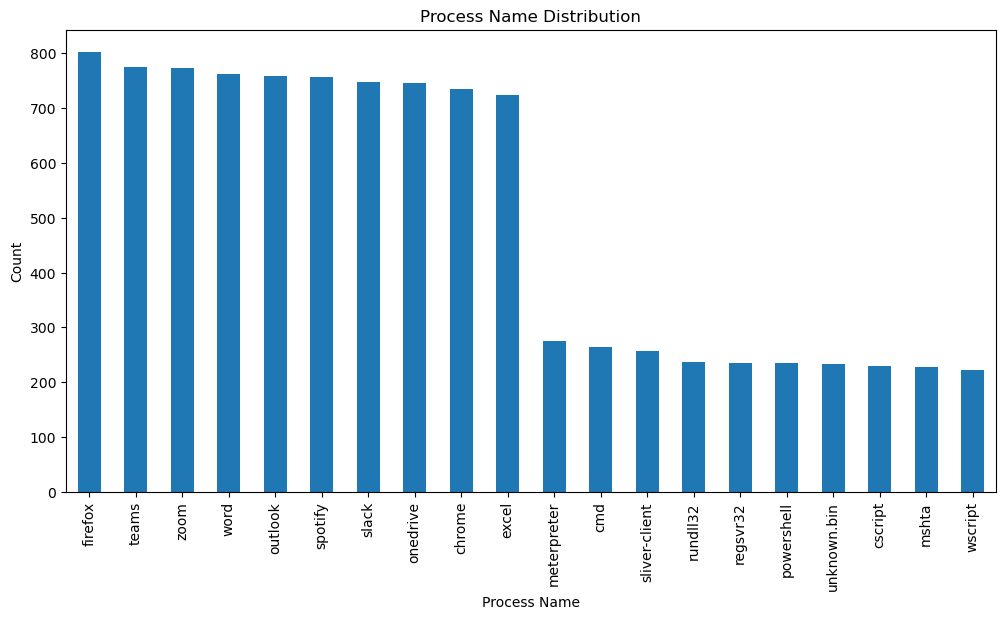

In [11]:
df_proc_name.plot(kind='bar', x='proc_name', y='count', legend=False, figsize=(12, 6))
plt.title('Process Name Distribution')
plt.xlabel('Process Name')
plt.ylabel('Count')
plt.show()


In [12]:
print(beacon_df.head())

        event_id   host_id            timestamp          src_ip  \
0  EVT-373857567  HOST-116  2025-02-02 19:44:31  192.168.59.229   
1  EVT-380924157  HOST-028  2025-02-06 06:39:00   10.184.88.189   
2  EVT-674957844  HOST-055  2025-02-07 19:08:52  192.168.220.53   
3  EVT-910824095  HOST-107  2025-02-01 12:51:28   10.182.26.253   
4  EVT-959358092  HOST-008  2025-02-01 12:44:21   10.144.27.253   

          dst_ip  dst_port protocol  bytes_out  bytes_in  inter_event_seconds  \
0   30.22.199.92        53      dns       7883      3178            60.970370   
1   214.88.35.75        80      tcp       4905     33319           364.783584   
2   122.183.77.3       443    https       6785      3914            85.435310   
3  221.107.37.31       443    https       2694      3732            76.606740   
4   99.43.113.49       443    https       3379       824            78.295573   

        proc_name     user country_code  signed_binary  label  
0    rundll32.exe  user032           JP       

1567


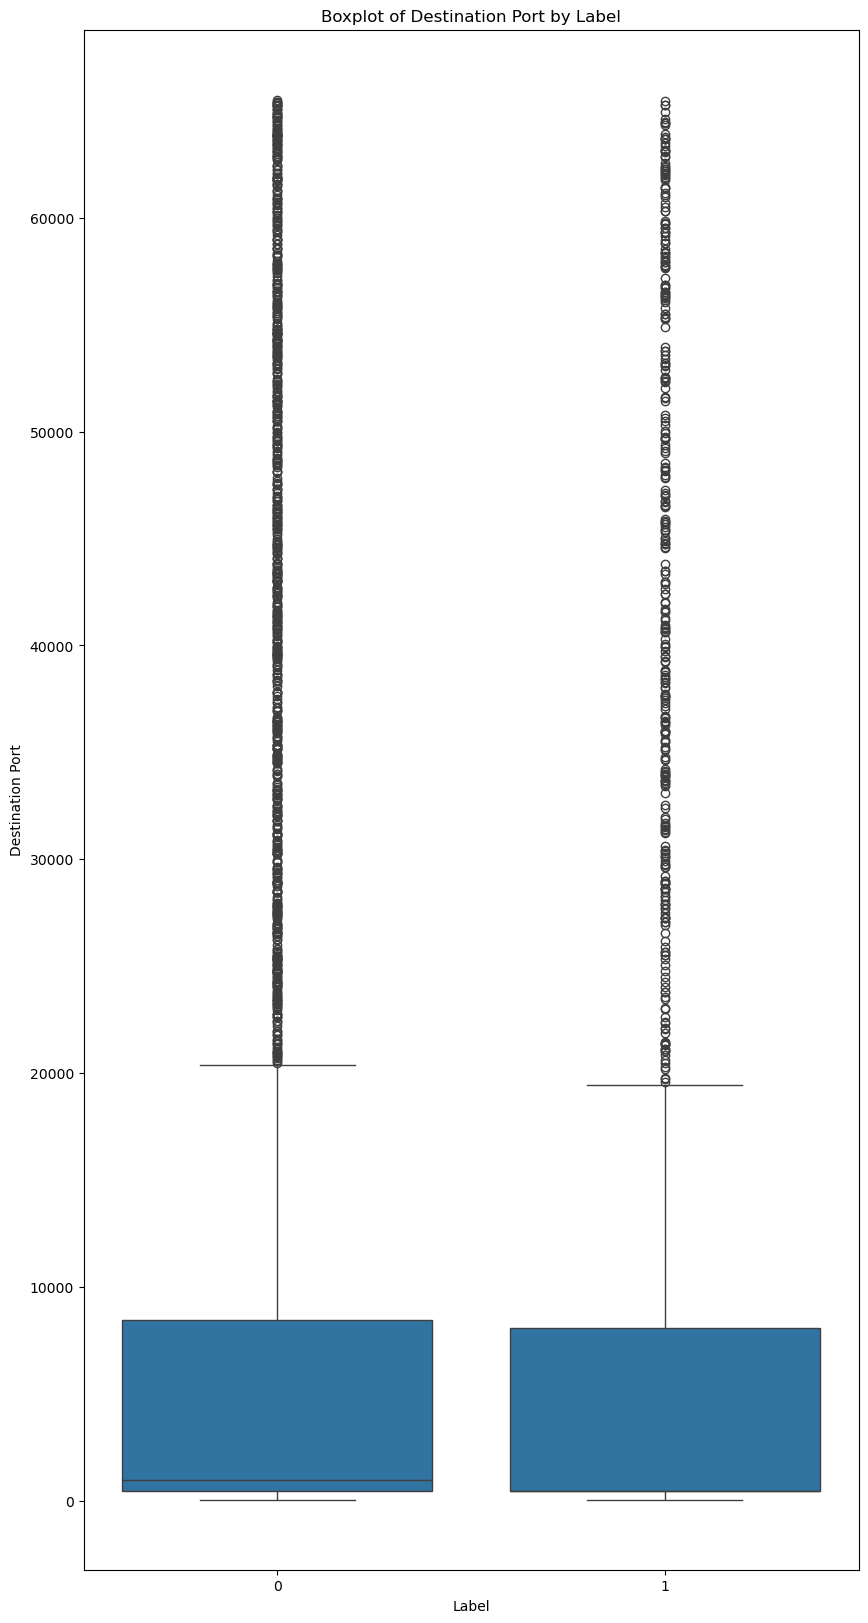

In [ ]:
## Boxplot feature versus labels

# from itertools import count
import seaborn as sns
import matplotlib.pyplot as plt

print(beacon_df['dst_port'].nunique())

df_dst_port = beacon_df[['dst_port', 'label']]

plt.figure(figsize=(10, 20))
sns.boxplot(x='label', y='dst_port', data=df_dst_port)
plt.title('Boxplot of Destination Port by Label')
plt.xlabel('Label')
plt.ylabel('Destination Port')
plt.show()

In [ ]:
import numpy as np

group_dst_port = beacon_df[['dst_port', 'label']].copy()
group_dst_port.groupby(['dst_port', 'label'])['label'].count()

   dst_port  label
0        53      1
1        80      0
2       443      1
3       443      1
4       443      1


dst_port  label
53        0        926
          1        237
80        0        945
          1        228
443       0        954
                  ... 
65382     0          1
65391     0          1
65409     0          1
65461     1          1
65519     0          1
Name: label, Length: 1577, dtype: int64